In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the data from csv
x_train = pd.read_csv('X_train_update.csv', ',') 
y_train = pd.read_csv('Y_train_CVw08PX.csv', ',')
x_test = pd.read_csv('X_test_update.csv', ',')

In [3]:
#Dropping the unwanted columns
x_train = x_train.drop(['description'], axis = 1)
x_test = x_test.drop(['description'], axis = 1)

In [9]:
#Making changes to the id to map the id to name of the image in the train data
x_train['Unnamed: 0'] = 'image_' + x_train['imageid'].map(str) + '_product_' + x_train['productid'].map(str) + '.jpg'

In [5]:
#Making changes to the id to map the id to name of the image in the train data
y_train['Unnamed: 0'] = 'image_' + x_train['imageid'].map(str) + '_product_' + x_train['productid'].map(str) + '.jpg'

In [6]:
y_train

,Unnamed: 0,prdtypecode
0,image_1263597046_product_3804725264.jpg,10
1,image_1008141237_product_436067568.jpg,2280
2,image_938777978_product_201115110.jpg,50
3,image_457047496_product_50418756.jpg,1280
4,image_1077757786_product_278535884.jpg,2705
...,...,...
84911,image_941495734_product_206719094.jpg,40
84912,image_1188462883_product_3065095706.jpg,2583
84913,image_1009325617_product_440707564.jpg,2280
84914,image_1267353403_product_3942400296.jpg,1560


In [36]:
#merging to a single dataframe
train = pd.merge(x_train, y_train, on='Unnamed: 0', how='outer')
train['prdtypecode'] = train['prdtypecode'].apply(str)

In [37]:
train

,Unnamed: 0,designation,productid,imageid,prdtypecode
0,image_1263597046_product_3804725264.jpg,Olivia: Personalisiertes Notizbuch / 150 Seite...,3804725264,1263597046,10
1,image_1008141237_product_436067568.jpg,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,436067568,1008141237,2280
2,image_938777978_product_201115110.jpg,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,201115110,938777978,50
3,image_457047496_product_50418756.jpg,Peluche Donald - Europe - Disneyland 2000 (Mar...,50418756,457047496,1280
4,image_1077757786_product_278535884.jpg,La Guerre Des Tuques,278535884,1077757786,2705
...,...,...,...,...,...
84911,image_941495734_product_206719094.jpg,The Sims [ Import Anglais ],206719094,941495734,40
84912,image_1188462883_product_3065095706.jpg,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,3065095706,1188462883,2583
84913,image_1009325617_product_440707564.jpg,Journal Officiel De La Republique Francaise N°...,440707564,1009325617,2280
84914,image_1267353403_product_3942400296.jpg,Table Basse Bois De Récupération Massif Base B...,3942400296,1267353403,1560


In [51]:
#list of the labels
labels = list(y_train.prdtypecode.unique())
labels.sort()
print(labels)
print(len(set(labels)))

[10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281, 1300, 1301, 1302, 1320, 1560, 1920, 1940, 2060, 2220, 2280, 2403, 2462, 2522, 2582, 2583, 2585, 2705, 2905]
27


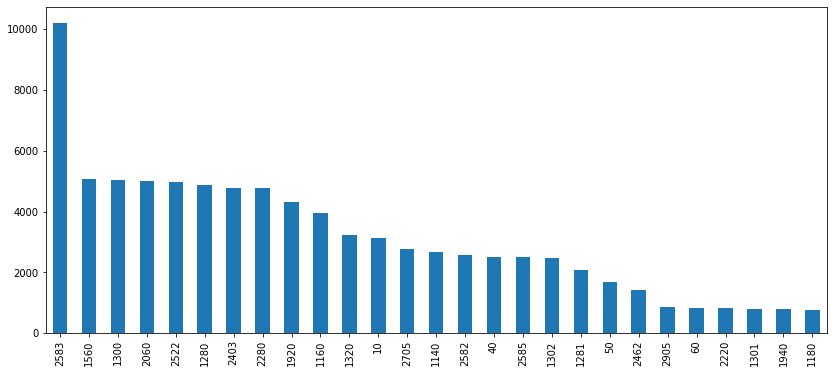

In [52]:
#distribution of labels across the train data
plt.figure(figsize=(14,6))
y_train.prdtypecode.value_counts().plot(kind='bar')
plt.show()

In [13]:

from keras_preprocessing.image import ImageDataGenerator

# create a data generator
datagen=ImageDataGenerator(rescale=1./255.)

In [38]:
# load and iterate training dataset
train_generator = datagen.flow_from_dataframe(
dataframe = train,
directory = "/Users/prannoynoel/Documents/DS/Ensemble /project/images/image_train",
x_col = 'Unnamed: 0',
y_col = 'prdtypecode',
batch_size=32,
seed=42,
class_mode='categorical', 
shuffle=True,
target_size=(32,32))


Found 84916 validated image filenames belonging to 27 classes.


In [17]:
train_generator

In [18]:
#Making changes to the id to map the id to name of the image in the test data
x_test['Unnamed: 0'] = 'image_' + x_test['imageid'].map(str) + '_product_' + x_test['productid'].map(str) + '.jpg'

In [20]:
test_datagen=ImageDataGenerator(rescale=1./255.)

# load and iterate test dataset
test_generator=test_datagen.flow_from_dataframe(
dataframe=x_test,
directory="/Users/prannoynoel/Documents/DS/Ensemble /project/images/image_test",
x_col="Unnamed: 0",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(32,32))

Found 13812 validated image filenames.


In [25]:
from keras.utils import to_categorical
train_labels = to_categorical(labels)

In [26]:
print(train_labels.shape)

(27, 2906)


In [31]:
from keras.layers import Reshape, Flatten, Dense, Dropout
from keras.layers.embeddings import Embedding
import keras
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D

#creating a neural network
model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=27, activation="softmax"))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)        

In [33]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# fit model
model.fit_generator(train_generator,
                   epochs = 1)

Epoch 1/1
2654/2654 [==============================] - 2569s 968ms/step - loss: 2.5809 - accuracy: 0.2389


In [42]:
#reset the test_generator  make a prediction
test_generator.reset()
pred = model.predict_generator(test_generator,
                                verbose=1)

432/432 [==============================] - 110s 256ms/step


In [43]:
predicted_class_indices=np.argmax(pred,axis=1)

In [44]:
#map the predicted labels with their unique ids
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [49]:
#labels predicted
k = np.array(predictions)
np.unique(k)

array(['10', '1140', '1160', '1280', '1300', '1920', '2060', '2280',
       '2403', '2522', '2583', '2705'], dtype='<U4')

In [45]:
#importing into a csv file
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)